In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
# Не показывать FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Logit/probit-модель: прогнозирование, предельные значения

labour force equation

Для датасета mroz_Green рассморим регрессию LFP на WA, log(FAMINC), WE, KL6, K618, CIT, UN трёх спецификаций: LPM
logit
probit

In [3]:
# подключим датасет mroz_Greene по ссылке 
df = pd.read_csv('TableF5-1.csv', na_values=(' ', '', '  '))
#подключим датасет mroz_Greene из локального файла
#df = pd.read_csv('TableF5-1.csv', na_values=(' ', '', '  '))

Спецификация и подгонка

In [4]:
# LPM 
res_lpm_hc = smf.ols(formula='LFP~WA+np.log(FAMINC)+WE+KL6+K618+CIT+UN', data=df).fit(cov_type='HC3')

In [5]:
# logit
res_logit = smf.logit(formula='LFP~WA+np.log(FAMINC)+WE+KL6+K618+CIT+UN', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.614104
         Iterations 5


In [6]:
# probit
res_probit = smf.probit(formula='LFP~WA+np.log(FAMINC)+WE+KL6+K618+CIT+UN', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.614282
         Iterations 5


In [7]:
# Сравнение моделей
print(summary_col([res_lpm_hc, res_logit, res_probit], model_names=['Robust LPM', 'logit', 'probit'], float_format="%.3f", stars=True, info_dict = {'Observations': lambda x: '{0:d}'.format(int(x.nobs)), 'Log Likelihood': lambda x: '{:.3f}'.format(x.llf), 'Akaike Inf. Crit.': lambda x: '{:.3f}'.format(x.aic)}))



                  Robust LPM   logit     probit 
------------------------------------------------
CIT               -0.048     -0.214    -0.126   
                  (0.037)    (0.176)   (0.107)  
Intercept         0.079      -1.856    -1.108   
                  (0.362)    (1.679)   (1.014)  
K618              -0.018     -0.095    -0.057   
                  (0.014)    (0.067)   (0.040)  
KL6               -0.302***  -1.443*** -0.868***
                  (0.034)    (0.194)   (0.112)  
R-squared         0.130                         
R-squared Adj.    0.122                         
UN                -0.004     -0.017    -0.011   
                  (0.006)    (0.026)   (0.016)  
WA                -0.013***  -0.063*** -0.038***
                  (0.002)    (0.013)   (0.008)  
WE                0.038***   0.179***  0.108*** 
                  (0.008)    (0.040)   (0.024)  
np.log(FAMINC)    0.075**    0.341**   0.205**  
                  (0.038)    (0.172)   (0.104)  
Observations      7

Как интерпретировать разные модели? LPM: для регрессора K618: при увеличении регрессора К618 (кол-во детей от 6 до 18) на единицу, вероятность того, что женщина работала в 1975 году уменьшается на 0,018 (1,8%)

для регрессора WE (уровень образования): разница вероятностей между уровней 0 и 1 равна 0,038  и тд              

Интерпретация logit: при увеличении кол-ва детей от 6 до 18 (К618) на единицу, отношение шансов того, что женщина работала в 1975 уменьшается на 9,5% и тд

Probit: можем интепретировать только знак!! то есть при увеличении кол-ва детей от 6 до 18 вероятность того, что женщина работала в 1975, уменьшаются

# Прогнозирование

In [11]:
# Создадим датафрейм с новыми данными регрессоров для прогноза
new_data = pd.DataFrame({'WA':[35, 40, 42], 
                         'FAMINC':[12500, 9800, 67800], 
                         'WE': [15, 12, 14], 
                         'KL6': [2, 1, 2],
                         'K618': [0, 2, 1], 
                         'CIT': [1, 0, 1], 
                         'UN':[5, 7.5, 3]})
new_data

,WA,FAMINC,WE,KL6,K618,CIT,UN
0,35,12500,15,2,0,1,5.0
1,40,9800,12,1,2,0,7.5
2,42,67800,14,2,1,1,3.0


In [12]:
# Прогноз для LPM с округлением до 3-х десятичных знаков
res_lpm_hc.predict(exog=new_data, transform=True).round(3)

0    0.221
1    0.329
2    0.207
dtype: float64

In [13]:
# Прогноз для logit с округлением до 3-х десятичных знаков
res_logit.predict(exog=new_data, transform=True).round(3)

0    0.209
1    0.300
2    0.192
dtype: float64

In [14]:
# Прогноз для probit с округлением до 3-х десятичных знаков
res_probit.predict(exog=new_data, transform=True).round(3)

0    0.214
1    0.307
2    0.196
dtype: float64

## logit/probit-регрессии: предельные значения

Для датасета mroz_Green рассморим регрессию LFP на WA, log(FAMINC), WE, KL6, K618, CIT, UN трёх спецификаций:

LPM
logit
probit

Предельный эффект показывает:

🔹 На сколько процентов меняется вероятность y = 1,
если одна переменная увеличивается на 1, при прочих равных. 📌 Это прямая интерпретация влияния переменных на вероятность, чего нельзя сделать напрямую по коэффициентам в логит/пробит.

In [17]:
# в пред задании уже построили модели, поэтому ниже вывожу уже иъ сравнение

In [16]:
# Сравнение моделей
print(summary_col([res_lpm_hc, res_logit, res_probit], model_names=['Robust LPM', 'logit', 'probit'], float_format="%.3f", stars=True, info_dict = {'Observations': lambda x: '{0:d}'.format(int(x.nobs)), 'Log Likelihood': lambda x: '{:.3f}'.format(x.llf), 'Akaike Inf. Crit.': lambda x: '{:.3f}'.format(x.aic)}))


                  Robust LPM   logit     probit 
------------------------------------------------
CIT               -0.048     -0.214    -0.126   
                  (0.037)    (0.176)   (0.107)  
Intercept         0.079      -1.856    -1.108   
                  (0.362)    (1.679)   (1.014)  
K618              -0.018     -0.095    -0.057   
                  (0.014)    (0.067)   (0.040)  
KL6               -0.302***  -1.443*** -0.868***
                  (0.034)    (0.194)   (0.112)  
R-squared         0.130                         
R-squared Adj.    0.122                         
UN                -0.004     -0.017    -0.011   
                  (0.006)    (0.026)   (0.016)  
WA                -0.013***  -0.063*** -0.038***
                  (0.002)    (0.013)   (0.008)  
WE                0.038***   0.179***  0.108*** 
                  (0.008)    (0.040)   (0.024)  
np.log(FAMINC)    0.075**    0.341**   0.205**  
                  (0.038)    (0.172)   (0.104)  
Observations      7

Для вычисления предельных значений нужно указать указать параметр at:

- mean для вычисления предельного значения в средней точке
- overall для вычисления среднего по выборке предельного значения

### Предельные значения для каждого регрессора в средней точке для logit модели

In [18]:
margeff_logit = res_logit.get_margeff(at='mean')
# вывод результатов
margeff_logit.summary()
# краткий отчёт
# margeff_logit.summary_frame() 

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                    LFP
Method:                          dydx
At:                              mean
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
WA                -0.0154      0.003     -5.006      0.000      -0.021      -0.009
np.log(FAMINC)     0.0835      0.042      1.982      0.048       0.001       0.166
WE                 0.0439      0.010      4.450      0.000       0.025       0.063
KL6               -0.3527      0.048     -7.395      0.000      -0.446      -0.259
K618              -0.0232      0.016     -1.416      0.157      -0.055       0.009
CIT               -0.0522      0.043     -1.211      0.226      -0.137       0.032
UN                -0.0043      0.006     -0.675      0.500      -0.017       0.008
==================================================================================
"""

### Средние по выборке предельные значения для каждого регрессора в средней точке для logit модели

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                    LFP
Method:                          dydx
At:                           overall
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
WA                -0.0134      0.003     -5.324      0.000      -0.018      -0.008
np.log(FAMINC)     0.0727      0.036      2.001      0.045       0.001       0.144
WE                 0.0382      0.008      4.667      0.000       0.022       0.054
KL6               -0.3074      0.036     -8.642      0.000      -0.377      -0.238
K618              -0.0202      0.014     -1.422      0.155      -0.048       0.008
CIT               -0.0455      0.037     -1.215      0.224      -0.119       0.028
UN                -0.0037      0.005     -0.676      0.499      -0.014       0.007
==================================================================================
"""

### Предельные значения для каждого регрессора в средней точке для probit модели


In [20]:
margeff_probit = res_probit.get_margeff(at='mean')
# вывод результатов
margeff_probit.summary()
# краткий отчёт
# margeff_probit.summary_frame() 

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                    LFP
Method:                          dydx
At:                              mean
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
WA                -0.0149      0.003     -5.053      0.000      -0.021      -0.009
np.log(FAMINC)     0.0805      0.041      1.973      0.049       0.001       0.161
WE                 0.0425      0.009      4.504      0.000       0.024       0.061
KL6               -0.3405      0.044     -7.738      0.000      -0.427      -0.254
K618              -0.0223      0.016     -1.407      0.160      -0.053       0.009
CIT               -0.0492      0.042     -1.170      0.242      -0.132       0.033
UN                -0.0041      0.006     -0.670      0.503      -0.016       0.008
==================================================================================
"""

### Средние по выборке предельные значения для каждого регрессора в средней точке для probit модели

In [21]:
margeff_probit = res_probit.get_margeff(at='overall')
# вывод результатов
margeff_probit.summary()
# краткий отчёт
# margeff_probit.summary_frame() 

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                    LFP
Method:                          dydx
At:                           overall
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
WA                -0.0134      0.003     -5.314      0.000      -0.018      -0.008
np.log(FAMINC)     0.0720      0.036      1.987      0.047       0.001       0.143
WE                 0.0380      0.008      4.686      0.000       0.022       0.054
KL6               -0.3044      0.035     -8.818      0.000      -0.372      -0.237
K618              -0.0199      0.014     -1.412      0.158      -0.048       0.008
CIT               -0.0440      0.038     -1.173      0.241      -0.118       0.030
UN                -0.0037      0.005     -0.671      0.502      -0.014       0.007
==================================================================================
"""

Интерпретация dy/dx:

dy/dx = 0.0521 для educ:
→ При увеличении образования на 1 год, вероятность участия в рабочей силе увеличивается на 5.2 п.п.

dy/dx = -0.0012 для faminc:
→ При увеличении дохода на 1 (в той же шкале, как в данных), вероятность уменьшается на 0.12 п.п.

## probit-регрессия: Качество подгонки и Сравнение моделей

🔹 Зачем нужна оценка подгонки?

Чтобы понять, насколько хорошо модель объясняет данные, и насколько точны её прогнозы.

В линейной модели (LPM) ты бы смотрел на R².
Но для логит / пробит моделей R² напрямую не используется, потому что у нас:

Нелинейная модель

Бинарный отклик (y = 0 или 1)

Чем меньше переменных — тем проще и устойчивее модель.

Модель 4 — самая простая

Модель 1 — самая полная (все переменные)

📌 Если тебе важна простота, но при этом сохранить хорошую подгонку, модель 3 или 4 может подойти.

In [23]:
df = pd.read_csv('TableF5-1.csv')
#подключим датасет mroz_Greene из локального файла
#df = pd.read_csv('TableF5-1.csv')
df.head()

,LFP,WHRS,KL6,K618,WA,WE,WW,RPWG,HHRS,HA,HE,HW,FAMINC,MTR,WMED,WFED,UN,CIT,AX
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,0.7215,12,7,5.0,0,14
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,0.6615,7,7,11.0,1,5
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,0.6915,12,7,5.0,0,15
3,1,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,0.7815,7,7,5.0,0,6
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,0.6215,12,14,9.5,1,7


In [25]:
# model 1
mod_1 = smf.probit(formula = 'LFP~WA+I(WA**2)+WE+KL6+K618+CIT+UN+np.log(FAMINC)', data = df)
res_1 = mod_1.fit(disp=False)

# model 2
mod_2 = smf.probit(formula = 'LFP~WE+KL6+K618+CIT+UN+np.log(FAMINC)', data = df)
res_2 = mod_2.fit(disp=False)

# model 3
mod_3 = smf.probit(formula = 'LFP~WA+I(WA**2)+WE+KL6+np.log(FAMINC)', data = df)
res_3 = mod_3.fit(disp=False)

# model 4
mod_4 = smf.probit(formula = 'LFP~WA+I(WA**2)+WE+KL6', data = df)
res_4 = mod_4.fit(disp=False)

In [26]:
# Сравнение моделей
# Имена моделей
mod_names = ['Модель 1', 'Модель 2', 'Модель 3', 'Модель 4']
# порядок регрессоров в таблице
reg_order = ['Intercept', 'WA', 'I(WA ** 2)', 'WE', 'KL6', 'K618', 'CIT','UN', 'np.log(FAMINC)']
# Зависимая переменная LFP
summary_col([res_1, res_2, res_3, res_4], model_names=mod_names, stars=True, regressor_order=reg_order, float_format='%.3f')


,Модель 1,Модель 2,Модель 3,Модель 4
Intercept,-2.005,-2.673***,-1.435,-0.281
,(1.705),(0.957),(1.667),(1.503)
WA,0.008,,-0.018,-0.006
,(0.070),,(0.069),(0.068)
I(WA ** 2),-0.001,,-0.000,-0.000
,(0.001),,(0.001),(0.001)
WE,0.109***,0.124***,0.109***,0.123***
,(0.024),(0.024),(0.024),(0.022)
KL6,-0.851***,-0.621***,-0.847***,-0.855***
,(0.115),(0.098),(0.114),(0.115)


### Качество подгонки. Базовые показатели

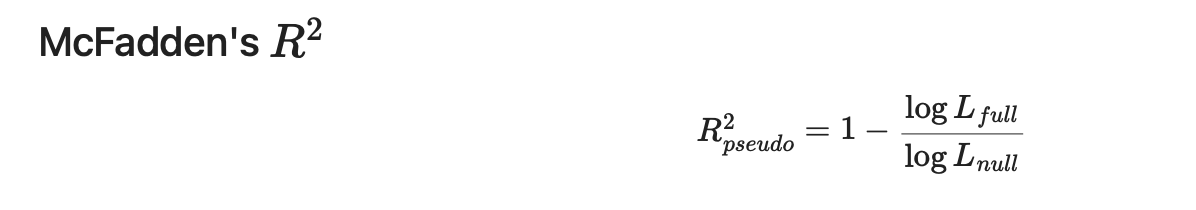

In [30]:
# pseudoR2 for model 1
res_1.prsquared.round(3)


0.102

In [31]:
# pseudoR2 for model 2
res_2.prsquared.round(3)

0.076

In [32]:

# pseudoR2 for model 3
res_3.prsquared.round(3)


0.097

In [33]:
# pseudoR2 for model 4
res_4.prsquared.round(3)

0.095

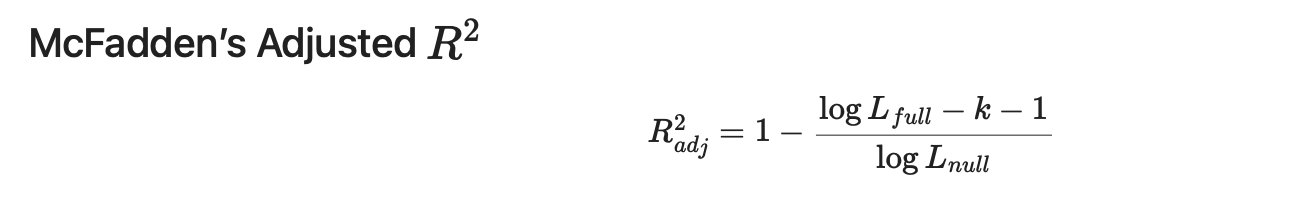

In [34]:
# pseudoR2.adj for model 1
(1-(res_1.llf-res_1.df_model-1)/res_1.llnull).round(3)

0.085

In [35]:
# pseudoR2.adj for model 2
(1-(res_2.llf-res_2.df_model-1)/res_2.llnull).round(3)

0.062

In [36]:
# pseudoR2.adj for model 3
(1-(res_3.llf-res_3.df_model-1)/res_3.llnull).round(3)

0.086

In [37]:
# pseudoR2.adj for model 4
(1-(res_4.llf-res_4.df_model-1)/res_4.llnull).round(3)

0.085

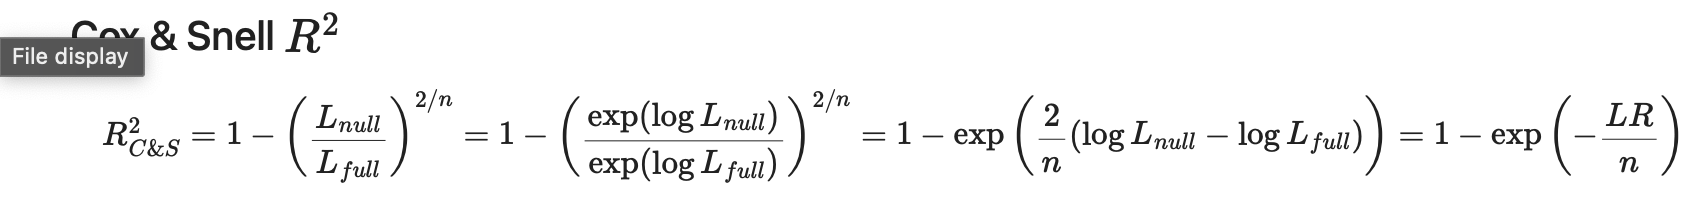

In [38]:
# Cox.Snell.R2 for model 1
(1-np.exp(-res_1.llr/res_1.nobs)).round(3)

0.13

In [39]:
# Cox.Snell.R2 for model 2
(1-np.exp(-res_2.llr/res_2.nobs)).round(3)

0.099

In [40]:
# Cox.Snell.R2 for model 3
(1-np.exp(-res_3.llr/res_3.nobs)).round(3)

0.125

In [41]:
# Cox.Snell.R2 for model 4
(1-np.exp(-res_4.llr/res_4.nobs)).round(3)


0.122

Есть еще Nagelkerke / Cragg & Uhler, Efron's, McKelvey & Zavoina's 

In [42]:
#Nagelkerke.R2 for model 1
#((1-np.exp(-res_1.llr/res_1.nobs))/(1-np.exp(2*res_1.llnull/res_1.nobs))).round(3)

# Efron.R2 for model 1
#(1-(np.sum(res_1.resid_response**2))/(res_1.nobs*np.var(mod_1.endog))).round(3)


#McKelvey.Zavoina.R2 for model 1
#y_prob_1 = res_1.predict(mod_1.exog, transform=False)

# probit
#(np.var(y_prob_1)/(np.var(y_prob_1)+1)).round(3)

In [43]:
# Вывод McFadden R^2 для всех моделей
print("McFadden's R^2:")
for i, res in enumerate([res_1, res_2, res_3, res_4], start=1):
    print(f"Модель {i}: {res.prsquared:.3f}")

McFadden's R^2:
Модель 1: 0.102
Модель 2: 0.076
Модель 3: 0.097
Модель 4: 0.095


чем больше R^2 тем лучше модель

✅ Модель 1 — самая полная, теоретически сильная и по подгонке лучшая
➖ Но она самая тяжёлая (много переменных)

✅ Модель 3 — компромисс между подгонкой и простотой
➕ Убрали CIT, UN, но осталась нелинейность возраста

✅ Модель 4 — минимализм
➖ Похуже по R², но проста

## probit-регрессия: Сравнение моделей

🔹 AIC (Akaike Information Criterion)

Чем ниже AIC, тем лучше модель

Учитывает как подгонку, так и штраф за число параметров

🔹 BIC (Bayesian Information Criterion)

То же самое, но сильнее штрафует за сложность

Если моделей немного — BIC хорош для сравнения

🔹 R²_adj (adjusted McFadden)

Похоже на обычный скорректированный R²

Показывает, насколько хорошо модель объясняет данные, с поправкой на количество переменных

Спецификация и подгонка нескольких моделей

In [45]:
# model 1
mod_11 = smf.probit(formula = 'LFP~WA+I(WA**2)+WE+KL6+K618+CIT+UN+np.log(FAMINC)', data = df)
res_11 = mod_11.fit(disp=False)

In [46]:
# model 2
mod_22 = smf.probit(formula = 'LFP~WE+KL6+K618+CIT+UN+np.log(FAMINC)', data = df)
res_22 = mod_22.fit(disp=False)

In [47]:
# model 3
mod_33 = smf.probit(formula = 'LFP~WA+I(WA**2)+WE+KL6+np.log(FAMINC)', data = df)
res_33 = mod_33.fit(disp=False)

In [48]:
# model 4
mod_44 = smf.probit(formula = 'LFP~WA+I(WA**2)+WE+KL6', data = df)
res_44 = mod_44.fit(disp=False)

In [49]:
# Сравнение моделей
# Имена моделей
mod_names = ['Модель 1', 'Модель 2', 'Модель 3', 'Модель 4']
# порядок регрессоров в таблице
reg_order = ['Intercept', 'WA', 'I(WA ** 2)', 'WE', 'KL6', 'K618', 'CIT','UN', 'np.log(FAMINC)']
# Зависимая переменная LFP
summary_col([res_11, res_22, res_33, res_44], model_names=mod_names, stars=True, regressor_order=reg_order, float_format='%.3f')

,Модель 1,Модель 2,Модель 3,Модель 4
Intercept,-2.005,-2.673***,-1.435,-0.281
,(1.705),(0.957),(1.667),(1.503)
WA,0.008,,-0.018,-0.006
,(0.070),,(0.069),(0.068)
I(WA ** 2),-0.001,,-0.000,-0.000
,(0.001),,(0.001),(0.001)
WE,0.109***,0.124***,0.109***,0.123***
,(0.024),(0.024),(0.024),(0.022)
KL6,-0.851***,-0.621***,-0.847***,-0.855***
,(0.115),(0.098),(0.114),(0.115)


Вывод нескольких моделей на в одной таблице с включением показателей AIC, BIC, pseudo-R^2

In [50]:
# Имена моделей
mod_names = ['Модель 1', 'Модель 2', 'Модель 3', 'Модель 4']
# порядок регрессоров в таблице
reg_order = ['Intercept', 'WA', 'I(WA ** 2)', 'WE', 'KL6', 'K618', 'CIT','UN', 'np.log(FAMINC)']
# словарь с тем, что добавим 
info_to_add = {'AIC': lambda x: '%.3f' % x.aic, 'BIC': lambda x: '%.3f' % x.bic, 'R2_adj': lambda x: '%.3f' % (1-(x.llf-x.df_model-1)/x.llnull) }
# параметр '%.3f' % отвечает за округление до 3-х знаков после запятой числа указанного после знака процента

# Зависимая переменная LFP
summary_col(results=[res_11, res_22, res_33, res_44], model_names=mod_names, stars=True, float_format='%.3f', regressor_order=reg_order, info_dict=info_to_add)


,Модель 1,Модель 2,Модель 3,Модель 4
Intercept,-2.005,-2.673***,-1.435,-0.281
,(1.705),(0.957),(1.667),(1.503)
WA,0.008,,-0.018,-0.006
,(0.070),,(0.069),(0.068)
I(WA ** 2),-0.001,,-0.000,-0.000
,(0.001),,(0.001),(0.001)
WE,0.109***,0.124***,0.109***,0.123***
,(0.024),(0.024),(0.024),(0.022)
KL6,-0.851***,-0.621***,-0.847***,-0.855***
,(0.115),(0.098),(0.114),(0.115)


Как выбрать лучшую модель?

AIC / BIC минимальны → модель хорошо сбалансирована

R²_adj максимален → модель лучше объясняет зависимую переменную

Коэффициенты значимы → модель интерпретируема

По наименьшему значению AIC и наибольшему значению скорректированного псевдо-R², наилучшей является Модель 3, поскольку она обеспечивает баланс между качеством подгонки и простотой модели.
Модель 1 имеет чуть лучшее качество по R², но она более сложная (больше переменных).

In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, roc_auc_score # ROC-curve and AUC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier # градиентный бустинг & случайный лес
import matplotlib.pyplot as plt
from statsmodels.tools import add_constant
import statsmodels.api as sm

In [54]:
# подключим датасет по ссылке 
df = pd.read_csv('TableF7-3.csv', na_values=(' ', '', '  '))
#подключим датасет из локального файла
#df = pd.read_csv('TableF7-3.csv', na_values=(' ', '', '  '))
df.head()

,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,0,0,27.250000,4,0,0,0,0,1200.000000,0,18000.0,0.000667,NaN,NaN
1,0,0,40.833332,111,3,0,0,1,4000.000000,0,13500.0,0.000222,NaN,NaN
2,1,0,37.666668,54,3,0,0,1,3666.666667,0,11300.0,0.033270,121.989677,4.803936
3,1,0,42.500000,60,3,0,0,1,2000.000000,0,17250.0,0.048427,96.853621,4.573201
4,1,0,21.333334,8,0,0,0,0,2916.666667,0,35000.0,0.016523,48.191670,3.875186


In [55]:
# зададим зависимую переменную
y = df['DEFAULT']
# Добавляем столбец с единицами к матрице регрессоров (признаков), искллючив из нее переменные DEFAULT, SPENDING, LOGSPEND
X = add_constant(df.drop(columns=['DEFAULT', 'SPENDING','LOGSPEND']))
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
# зададим спецификацию модели
mod_logit = sm.Logit(endog=y_train, exog=X_train)
# подгонка модели
res_logit = mod_logit.fit()

         Current function value: 0.235682
         Iterations: 35


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


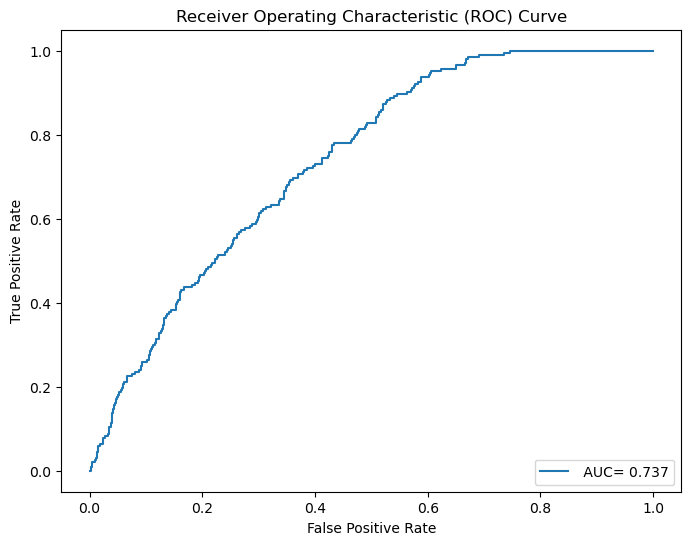

In [57]:
# строим прогнозы для тестового набора данных по логит-модели
y_pred_prob = res_logit.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
# fpr False Positive Rate
# tpr True Positive Rate
# threshold пороговые значения вероятностей

# вычисляем площадь под ROC-кривой
auc_roc = roc_auc_score(y_test, y_pred_prob)
# построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot (fpr, tpr, label=" AUC= %0.3f" % auc_roc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [58]:
# зададим спецификацию модели
mod_probit = sm.Probit(endog=y_train, exog=X_train)
# подгонка модели
res_probit = mod_probit.fit()

         Current function value: 0.235853
         Iterations: 35


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


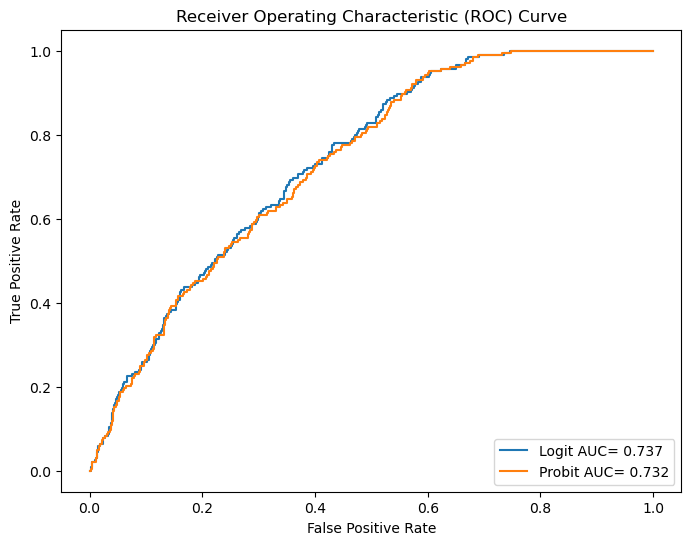

In [59]:
# строим прогнозы для тестового набора данных по логит-модели
y_pred_prob = res_logit.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# вычисляем площадь под ROC-кривой
auc_roc = roc_auc_score(y_test, y_pred_prob)

# построение ROC-кривой
plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot (fpr,tpr,label="Logit AUC= %0.3f" % auc_roc)

# строим прогнозы для тестового набора данных по пробит-модели
y_pred_prob = res_probit.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# вычисляем площадь под ROC-кривой
auc_roc = roc_auc_score(y_test, y_pred_prob)

# построение ROC-кривой
plt.plot (fpr,tpr,label="Probit AUC= %0.3f" % auc_roc)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [60]:
mod_logit_null = sm.Logit(endog=y_train, exog=np.ones(len(y_train)))
res_logit_null = mod_logit_null.fit()

Optimization terminated successfully.
         Current function value: 0.262955
         Iterations 6


In [61]:
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

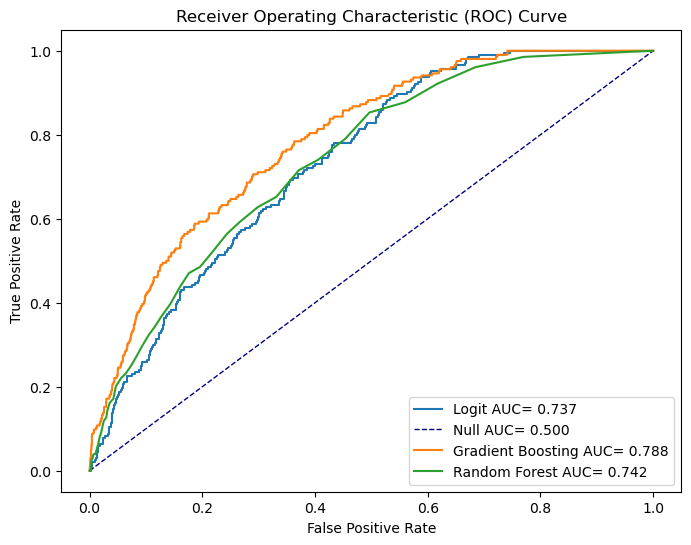

In [62]:
y_pred_prob = res_logit.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label="Logit AUC= %0.3f" % auc_roc)

y_pred_prob = res_logit_null.predict(np.ones(len(y_test)))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, color='navy', lw=1, linestyle='--', label="Null AUC= %0.3f" % auc_roc)

y_pred_prob = grad_boost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="Gradient Boosting AUC= %0.3f" % auc_roc)

y_pred_prob = rand_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label="Random Forest AUC= %0.3f" % auc_roc)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

Ты обучаешь модели (логит, пробит, random forest, градиентный бустинг) на данных, где:

Зависимая переменная: DEFAULT = 1 (дефолт), 0 (нет дефолта)

Модель предсказывает вероятность дефолта

Тебе нужно понять: насколько хорошо модель предсказывает?

Для этого используется ROC-анализ и AUC-метрика.

Ты сравниваешь 5 моделей по их способности предсказывать вероятность дефолта, и оцениваешь их с помощью:

ROC-кривой: показывает, как чувствительна модель и насколько мало ложных срабатываний

AUC: простое число от 0 до 1, где:

1 — идеальный классификатор

0.5 — случайные угадайки

< 0.5 — модель работает хуже случайной

Как интерпретировать ROC-график

Кривая ближе к верхнему левому углу → лучше

Прямая по диагонали → случайный классификатор

Ниже диагонали → хуже, чем случайный выбор